In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [20]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [21]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [22]:
data = np.array(data)
labels = np.array(labels)

In [23]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [25]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [26]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)         

In [28]:
epochs = 18
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/18
31367/31367 [==============================] - 14s 446us/step - loss: 1.8614 - accuracy: 0.5395 - val_loss: 0.3674 - val_accuracy: 0.9058
Epoch 2/18
31367/31367 [==============================] - 14s 460us/step - loss: 0.4959 - accuracy: 0.8592 - val_loss: 0.1456 - val_accuracy: 0.9594
Epoch 3/18
31367/31367 [==============================] - 14s 437us/step - loss: 0.3331 - accuracy: 0.9072 - val_loss: 0.1048 - val_accuracy: 0.9686
Epoch 4/18
31367/31367 [==============================] - 15s 477us/step - loss: 0.2922 - accuracy: 0.9196 - val_loss: 0.0614 - val_accuracy: 0.9856
Epoch 5/18
31367/31367 [==============================] - 16s 511us/step - loss: 0.2631 - accuracy: 0.9291 - val_loss: 0.0772 - val_accuracy: 0.9767
Epoch 6/18
31367/31367 [==============================] - 17s 543us/step - loss: 0.2561 - accuracy: 0.9318 - val_loss: 0.1332 - val_accuracy: 0.9611
Epoch 7/18
31367/31367 [==============================] -

In [29]:
model.save("my_model.h5")

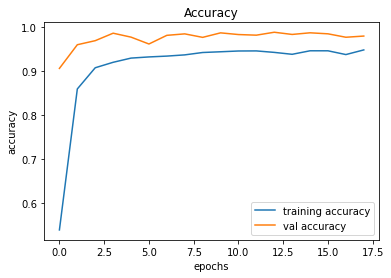

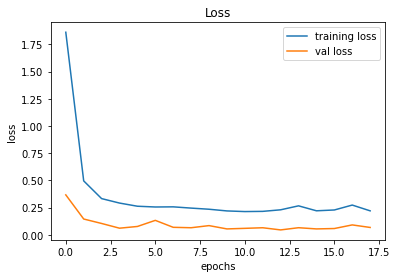

In [30]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_test = pd.read_csv('Test.csv')

In [33]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)
#Accuracy with the test data
print(accuracy_score(labels, pred))


0.9513064133016627


In [34]:
model.save('traffic_classifier.h5')
